In [11]:
import torch

# Create a sample signal
N = 32  # Number of points
t = torch.arange(N)
# Create a sparse sinusoidal signal
signal = torch.zeros(N)
signal[::4] = torch.sin(2 * torch.pi * t[::4] / N)  # Non-zero values at every 4th sample


# Compute FFT
fft_coeffs = torch.fft.fft(signal)

# Sort coefficients based on frequency (use fftshift)
sorted_coeffs = torch.fft.fftshift(fft_coeffs)

# Print results
print("FFT Coefficients (Sorted by Frequency):")
print(sorted_coeffs)


FFT Coefficients (Sorted by Frequency):
tensor([ 3.1787e-08+0.0000e+00j,  3.1630e-07-4.0000e+00j,
        -8.7423e-08+3.5763e-07j, -1.4146e-07+2.3842e-07j,
        -2.0663e-07-0.0000e+00j, -1.4146e-07-2.3842e-07j,
        -8.7423e-08-3.5763e-07j,  3.1630e-07+4.0000e+00j,
         3.1787e-08-0.0000e+00j,  3.1630e-07-4.0000e+00j,
        -8.7423e-08+3.5763e-07j, -1.4146e-07+2.3842e-07j,
        -2.0663e-07-0.0000e+00j, -1.4146e-07-2.3842e-07j,
        -8.7423e-08-3.5763e-07j,  3.1630e-07+4.0000e+00j,
         3.1787e-08+0.0000e+00j,  3.1630e-07-4.0000e+00j,
        -8.7423e-08+3.5763e-07j, -1.4146e-07+2.3842e-07j,
        -2.0663e-07+0.0000e+00j, -1.4146e-07-2.3842e-07j,
        -8.7423e-08-3.5763e-07j,  3.1630e-07+4.0000e+00j,
         3.1787e-08+0.0000e+00j,  3.1630e-07-4.0000e+00j,
        -8.7423e-08+3.5763e-07j, -1.4146e-07+2.3842e-07j,
        -2.0663e-07+0.0000e+00j, -1.4146e-07-2.3842e-07j,
        -8.7423e-08-3.5763e-07j,  3.1630e-07+4.0000e+00j])


In [31]:
sorted_coeffs.real.shape

torch.Size([32])

In [32]:
sorted_coeffs.imag.shape


torch.Size([32])

In [12]:
# Inverse FFT to reconstruct the signal
reconstructed_signal = torch.fft.ifft(sorted_coeffs)

# Print the reconstructed signal
print("Reconstructed Signal:")
print(reconstructed_signal)

Reconstructed Signal:
tensor([-3.5527e-15+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
         7.0711e-01+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
         1.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
         7.0711e-01+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        -8.7423e-08+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        -7.0711e-01+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        -1.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,
        -7.0711e-01+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j,  0.0000e+00+0.j])


In [14]:
reconstructed_signal.real

tensor([-3.5527e-15,  0.0000e+00,  0.0000e+00,  0.0000e+00,  7.0711e-01,
         0.0000e+00,  0.0000e+00,  0.0000e+00,  1.0000e+00,  0.0000e+00,
         0.0000e+00,  0.0000e+00,  7.0711e-01,  0.0000e+00,  0.0000e+00,
         0.0000e+00, -8.7423e-08,  0.0000e+00,  0.0000e+00,  0.0000e+00,
        -7.0711e-01,  0.0000e+00,  0.0000e+00,  0.0000e+00, -1.0000e+00,
         0.0000e+00,  0.0000e+00,  0.0000e+00, -7.0711e-01,  0.0000e+00,
         0.0000e+00,  0.0000e+00])

In [15]:
signal[0]


tensor(0.)

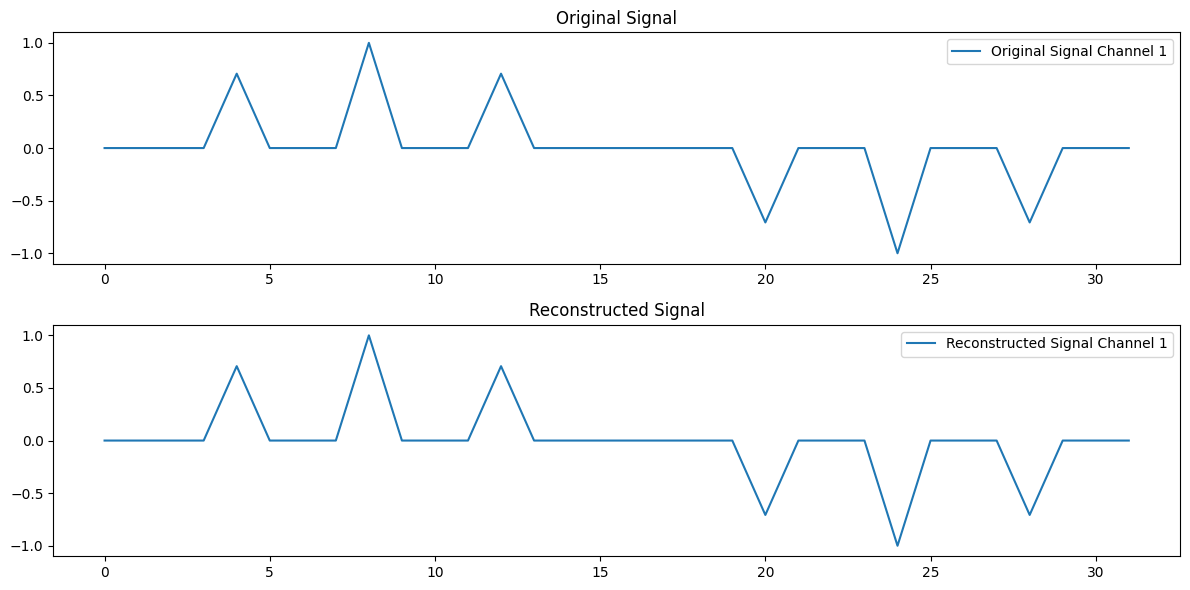

In [16]:
import matplotlib.pyplot as plt

# Plot the original signal
plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(signal.numpy(), label='Original Signal Channel 1')

plt.title('Original Signal')
plt.legend()

# Plot the reconstructed signal
plt.subplot(2, 1, 2)
plt.plot(reconstructed_signal.real.numpy(), label='Reconstructed Signal Channel 1')
plt.title('Reconstructed Signal')
plt.legend()

plt.tight_layout()
plt.show()

In [1]:
import pandas as pd
import scanpy as sc
sc.settings.verbosity = 3  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor="white")

/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/.venv4/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


scanpy==1.10.4 anndata==0.11.3 umap==0.5.7 numpy==2.1.3 scipy==1.15.1 pandas==2.2.3 scikit-learn==1.6.1 statsmodels==0.14.4 pynndescent==0.5.13


In [4]:
!mkdir data
!wget http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz -O data/pbmc3k_filtered_gene_bc_matrices.tar.gz
!cd data; tar -xzf pbmc3k_filtered_gene_bc_matrices.tar.gz
!mkdir write

--2025-02-05 05:43:25--  http://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Resolving cf.10xgenomics.com (cf.10xgenomics.com)... 104.18.0.173, 104.18.1.173, 2606:4700::6812:ad, ...
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz [following]
--2025-02-05 05:43:25--  https://cf.10xgenomics.com/samples/cell-exp/1.1.0/pbmc3k/pbmc3k_filtered_gene_bc_matrices.tar.gz
Connecting to cf.10xgenomics.com (cf.10xgenomics.com)|104.18.0.173|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7621991 (7.3M) [application/x-tar]
Saving to: ‘data/pbmc3k_filtered_gene_bc_matrices.tar.gz’

data/pbmc3k_filtere 100%[===================>]   7.27M  --.-KB/s    in 0.04s   

2025-02-05 05:43:26 (171 MB/s) - ‘data/pbmc3k_filtered_gene_bc_matrice

In [5]:
results_file = "../scDiff_data/write/pbmc3k.h5ad"

In [2]:
adata = sc.read_10x_mtx(
    "../scDiff_data/data/filtered_gene_bc_matrices/hg19/",  # the directory with the `.mtx` file
    var_names="gene_symbols",  # use gene symbols for the variable names (variables-axis index)
    cache=True,  # write a cache file for faster subsequent reading
)

... writing an h5ad cache file to speedup reading next time


In [3]:
adata.var_names_make_unique()  # this is unnecessary if using `var_names='gene_ids'` in `sc.read_10x_mtx`

In [4]:
adata

AnnData object with n_obs × n_vars = 2700 × 32738
    var: 'gene_ids'

In [5]:
sc.pp.filter_cells(adata, min_genes=200)
sc.pp.filter_genes(adata, min_cells=3)

filtered out 19024 genes that are detected in less than 3 cells


In [6]:
# annotate the group of mitochondrial genes as "mt"
adata.var["mt"] = adata.var_names.str.startswith("MT-")
sc.pp.calculate_qc_metrics(
    adata, qc_vars=["mt"], percent_top=None, log1p=False, inplace=True
)

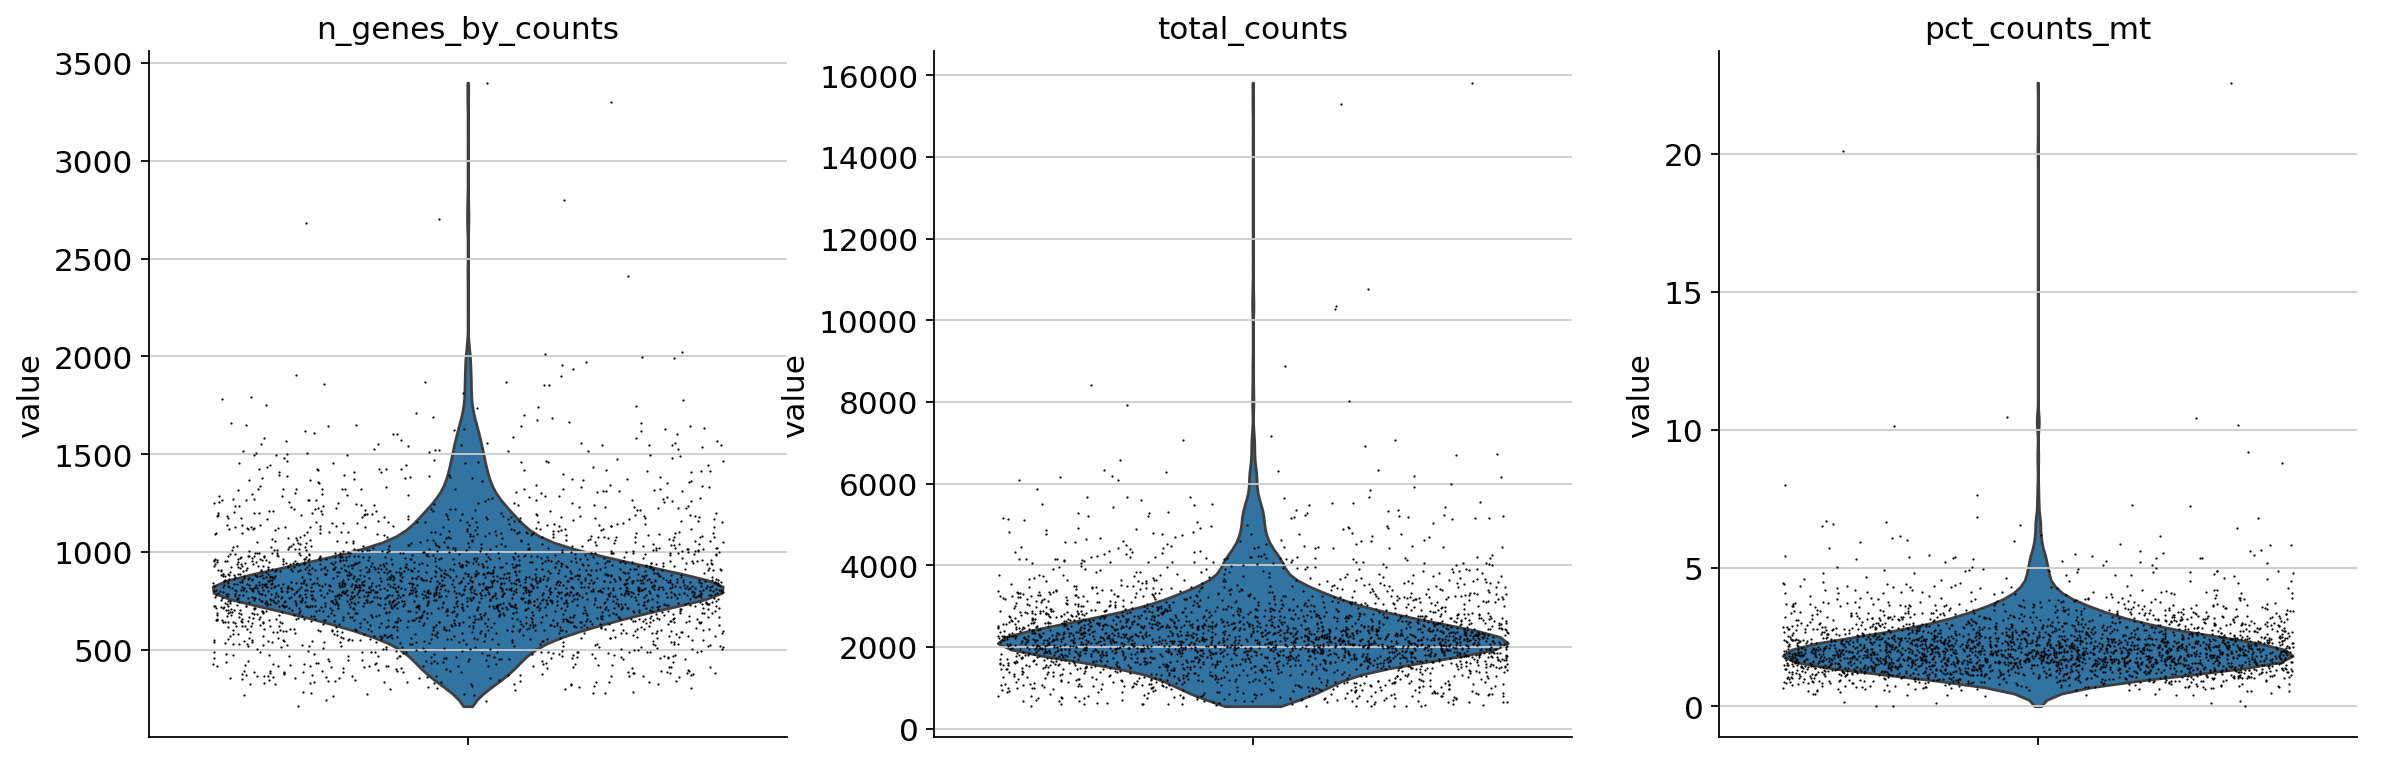

In [7]:
sc.pl.violin(
    adata,
    ["n_genes_by_counts", "total_counts", "pct_counts_mt"],
    jitter=0.4,
    multi_panel=True,
)

In [8]:
adata = adata[adata.obs.n_genes_by_counts < 2500, :]
adata = adata[adata.obs.pct_counts_mt < 5, :].copy()

In [9]:
sc.pp.normalize_total(adata, target_sum=1e4)

normalizing counts per cell
    finished (0:00:00)


In [10]:
sc.pp.log1p(adata)

In [11]:
# Identify the top 2000 highly variable genes
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

# Subset to highly variable genes
adata_hvg = adata[:, adata.var.highly_variable]

extracting highly variable genes
    finished (0:00:00)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)


regressing out ['total_counts', 'pct_counts_mt']
    finished (0:00:02)
computing PCA
    with n_comps=50
    finished (0:00:00)


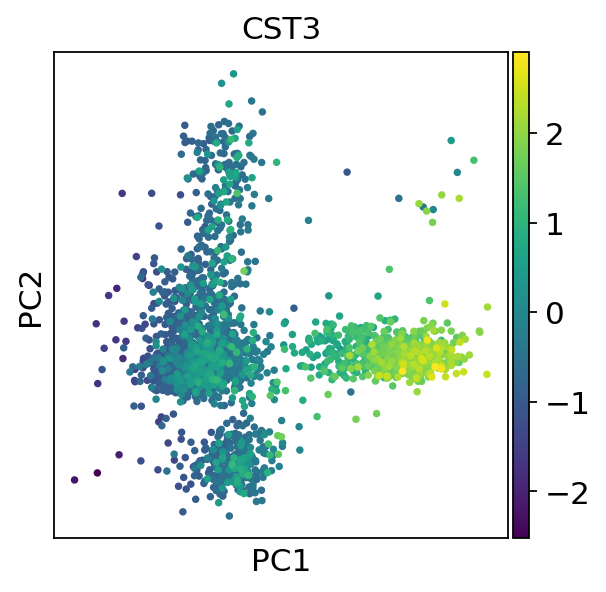

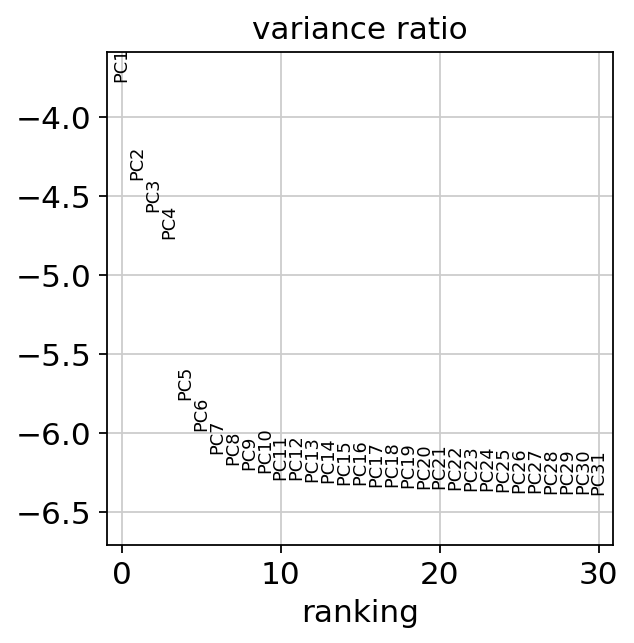

computing neighbors
    using 'X_pca' with n_pcs = 40
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:00)


In [20]:
sc.pp.regress_out(adata_hvg, ["total_counts", "pct_counts_mt"])
sc.pp.scale(adata_hvg, max_value=10)
sc.tl.pca(adata_hvg, svd_solver="arpack")
sc.pl.pca(adata_hvg, color="CST3")
sc.pl.pca_variance_ratio(adata_hvg, log=True)
sc.pp.neighbors(adata_hvg, n_neighbors=10, n_pcs=40)


In [27]:
sc.tl.leiden(adata_hvg)
sc.tl.paga(adata_hvg)
sc.pl.paga(adata_hvg, plot=False)  # remove `plot=False` if you want to see the coarse-grained graph
sc.tl.umap(adata_hvg, init_pos='paga')

running Leiden clustering


/tmp/ipykernel_59524/2658674730.py:1: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  sc.tl.leiden(adata_hvg)


    finished: found 9 clusters and added
    'leiden', the cluster labels (adata.obs, categorical) (0:00:00)
running PAGA
    finished: added
    'paga/connectivities', connectivities adjacency (adata.uns)
    'paga/connectivities_tree', connectivities subtree (adata.uns) (0:00:00)
--> added 'pos', the PAGA positions (adata.uns['paga'])
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:02)


computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm)
    'umap', UMAP parameters (adata.uns) (0:00:02)


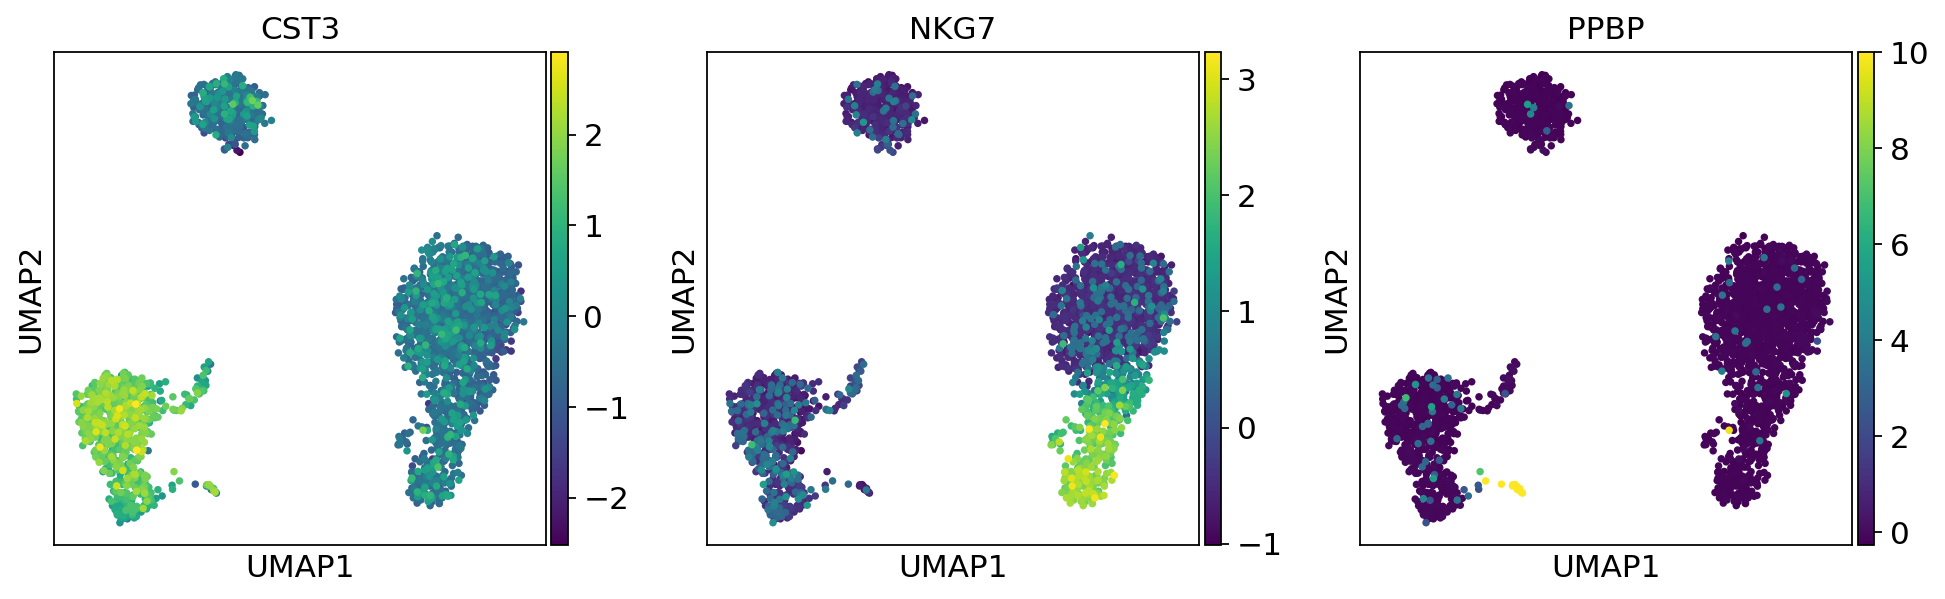

In [30]:
sc.tl.umap(adata_hvg)
sc.pl.umap(adata_hvg, color=["CST3", "NKG7", "PPBP"])

In [15]:
import numpy as np
X_dense = adata_hvg.X.toarray()

# Save the matrix
np.save("../scDiff_data/highly_variable_genes.npy", X_dense)

In [17]:
import numpy as np

# Save the normalized matrix as a NumPy array
np.save("../scDiff/normalized_matrix.npy", adata.X.toarray())

# To load it later
normalized_matrix = np.load("../scDiff/normalized_matrix.npy")


In [18]:
normalized_matrix.shape

(2638, 13714)

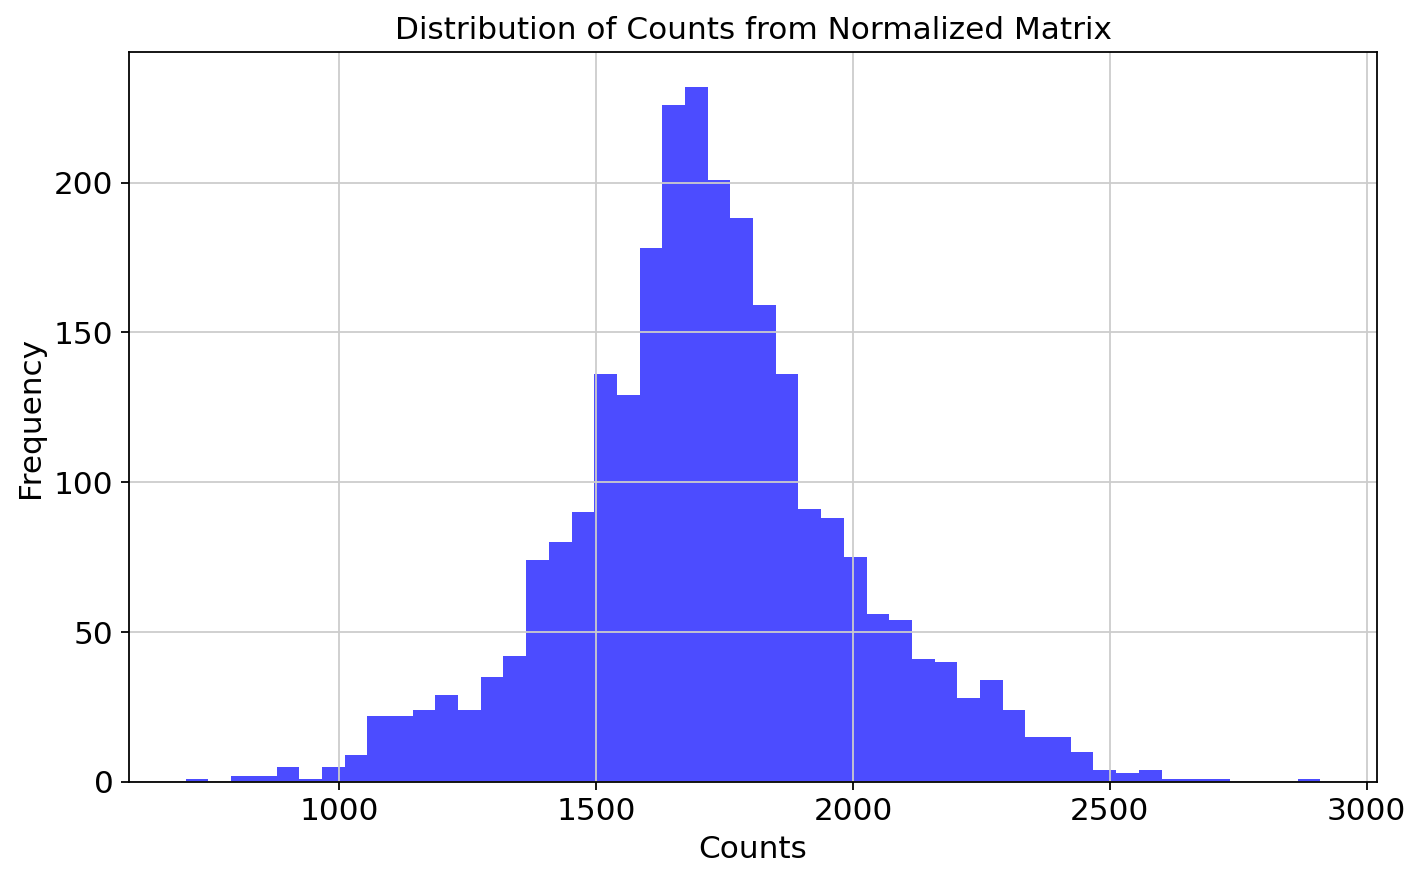

In [20]:
import matplotlib.pyplot as plt
# Get the distribution of counts from the normalized matrix
counts_distribution = np.sum(normalized_matrix, axis=1)

# Plot the distribution
plt.figure(figsize=(10, 6))
plt.hist(counts_distribution, bins=50, color='blue', alpha=0.7)
plt.title('Distribution of Counts from Normalized Matrix')
plt.xlabel('Counts')
plt.ylabel('Frequency')
plt.show()

In [21]:
counts_distribution.shape


(2638,)

In [3]:
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
data = np.load('../scDiff_data/normalized_matrix.npy')

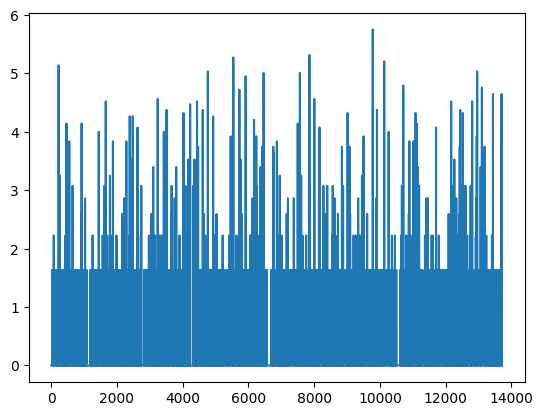

In [5]:
plt.plot(data[0, :])

In [16]:
data[0].min(), data[0].max()

(np.float32(0.0), np.float32(5.753142))

/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/.venv4/lib/python3.11/site-packages/matplotlib/cbook.py:1709: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/.venv4/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


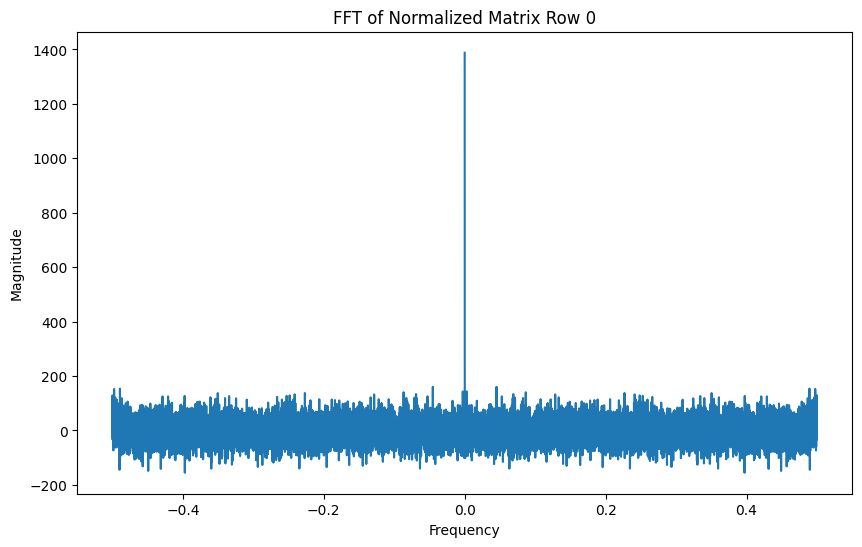

In [13]:
fft = np.fft.fft(data[4, :])
freq = np.fft.fftfreq(len(fft))
plt.figure(figsize=(10, 6))
plt.plot(freq, fft)
plt.title('FFT of Normalized Matrix Row 0')
plt.xlabel('Frequency')
plt.ylabel('Magnitude')
plt.show()

In [14]:
np.sum(data[4, :])

np.float32(1388.1254)

In [12]:
np.max(fft)

np.complex64(2040.1693+1.030287e-13j)

In [3]:
import torch
ffft_coeffs = torch.fft.fft(torch.tensor(data))  # Compute FFT
# Sort coefficients based on frequency (use fftshift)
sorted_coeffs = torch.fft.fftshift(ffft_coeffs)

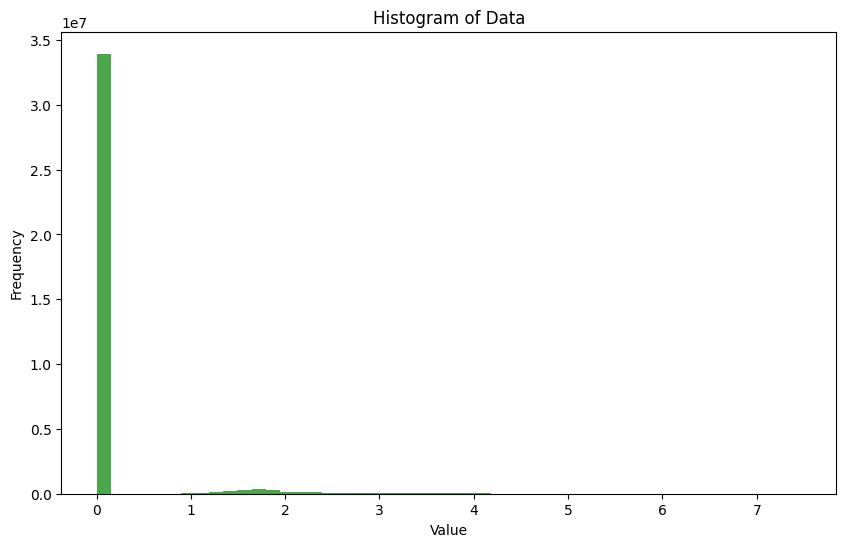

In [6]:
import matplotlib.pyplot as plt

# Flatten the data array to 1D
flattened_data = data.flatten()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(flattened_data, bins=50, color='green', alpha=0.7)
plt.title('Histogram of Data')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

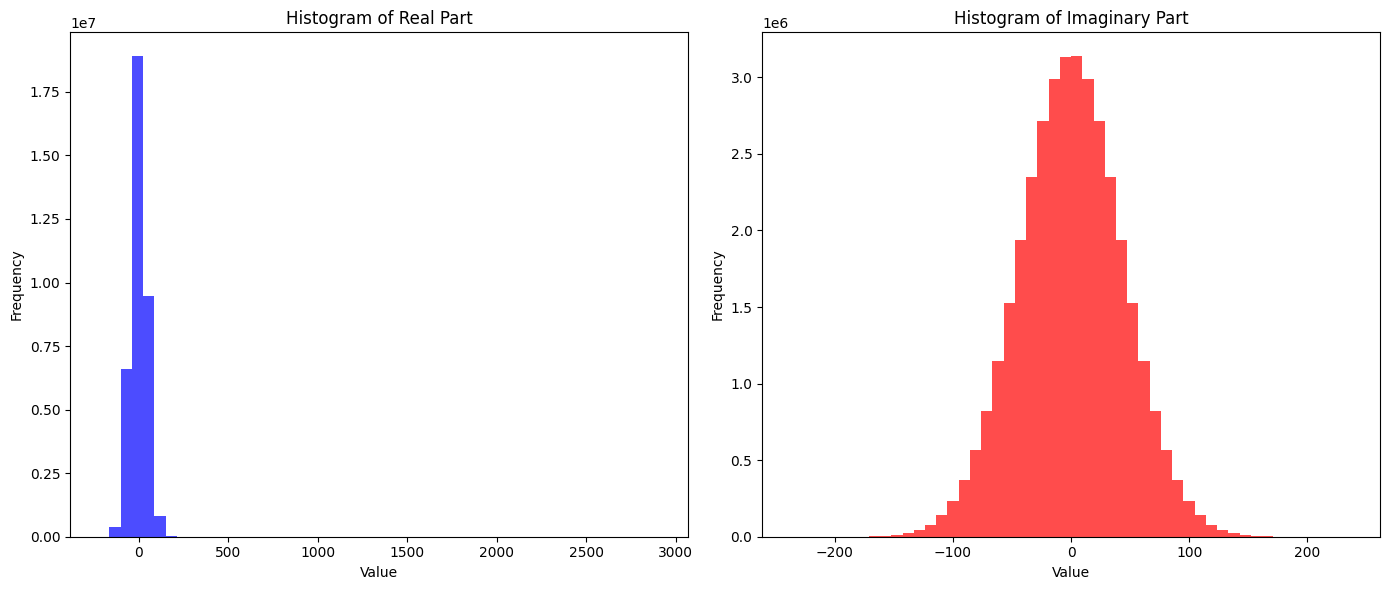

In [5]:
import matplotlib.pyplot as plt
real = sorted_coeffs.real
imag = sorted_coeffs.imag

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.hist(real.numpy().flatten(), bins=50, color='blue', alpha=0.7)
plt.title('Histogram of Real Part')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(imag.numpy().flatten(), bins=50, color='red', alpha=0.7)
plt.title('Histogram of Imaginary Part')
plt.xlabel('Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



# Training loss

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/scDiff_data/diffusion/version_0/metrics.csv')

In [64]:
len(df)

120

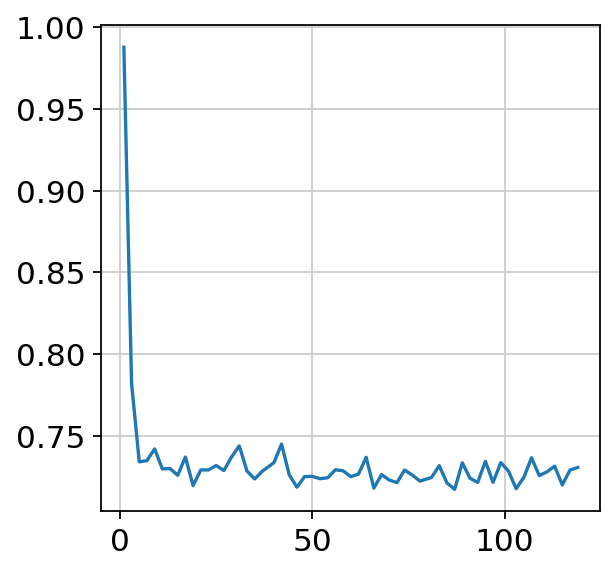

In [65]:
plt.plot(df['train_loss'].dropna())

In [44]:
epochs = df['epoch'].dropna()

In [47]:
df.loc[epochs.index]

,epoch,lr-AdamW,step,train_loss
1,0.0,NaN,39,0.790307
3,1.0,NaN,79,0.691953
5,2.0,NaN,119,0.723759
7,3.0,NaN,159,0.721058
9,4.0,NaN,199,0.789610
...,...,...,...,...
167,79.0,NaN,3359,0.687720
169,80.0,NaN,3399,0.781500
171,81.0,NaN,3439,0.739134
173,82.0,NaN,3479,0.806799


# Generating new samples

In [29]:

import torch
from dit import DiffusionModel

model = DiffusionModel(in_channels=2, hidden_size=256, depth=6, num_heads=8, timesteps=1000, beta_min=1e-4, beta_max=0.02, lr=1e-4, sequence_length=2000, T_max=100)
ckpt = torch.load('/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/scDiff_data/diffusion/version_0/checkpoints/epoch=59-step=2520.ckpt')

/tmp/ipykernel_433508/3457287066.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  ckpt = torch.load('/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/s

In [2]:
model.load_state_dict(ckpt['state_dict'])

<All keys matched successfully>

In [ ]:

generated_samples = []
for i in range(10):
    generated_samples.append(model.sample((1,2,2000)))

In [ ]:
torch.save(generated_samples, '/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/scDiff_data/diffusion/generated_samples.pt')

# Check properties of generated samples.

In [30]:

G = torch.load('/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/scDiff_data/diffusion/generated_samples.pt')

/tmp/ipykernel_433508/4218352466.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  G = torch.load('/mnt/czi-sci-ai/intrinsic-variation-gene-ex/project_gene_regulation/scDi

In [31]:
reconstructed_signal = []
for i in range(10):
    real = G[i][0][0]
    imag = G[i][0][1]
    fft_coeffs = torch.complex(real, imag)
    sample = torch.fft.ifft(fft_coeffs).real
    reconstructed_signal.append(sample)


In [32]:
import numpy as np
array = torch.stack(reconstructed_signal).numpy()
clamped_array = np.clip(array, 0, 1000000000)

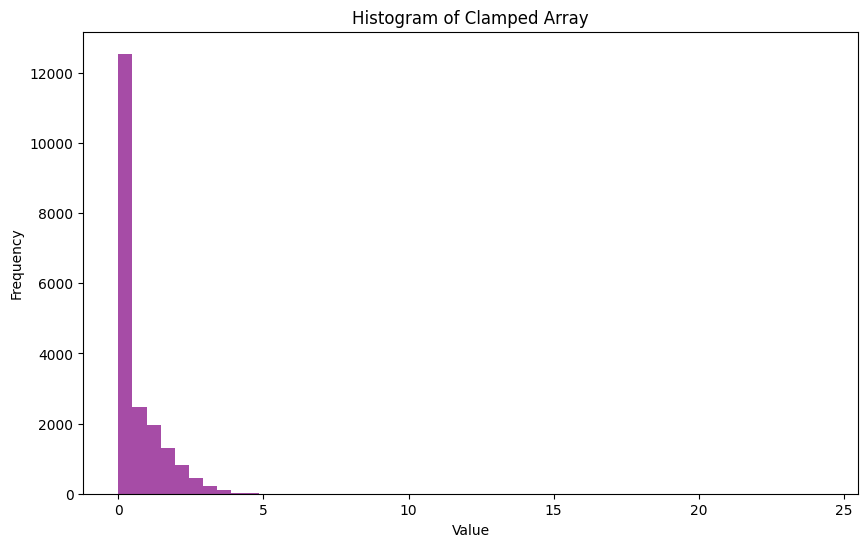

In [33]:
import matplotlib.pyplot as plt

# Plot the histogram of the clamped array
plt.figure(figsize=(10, 6))
plt.hist(clamped_array.flatten(), bins=50, color='purple', alpha=0.7)
plt.title('Histogram of Clamped Array')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

In [34]:
data = np.load('../scDiff_data/highly_variable_genes.npy')
data_all = np.concatenate((data, clamped_array), axis=0)
labels = np.concatenate((np.zeros(data.shape[0]), np.ones(clamped_array.shape[0])), axis=0)

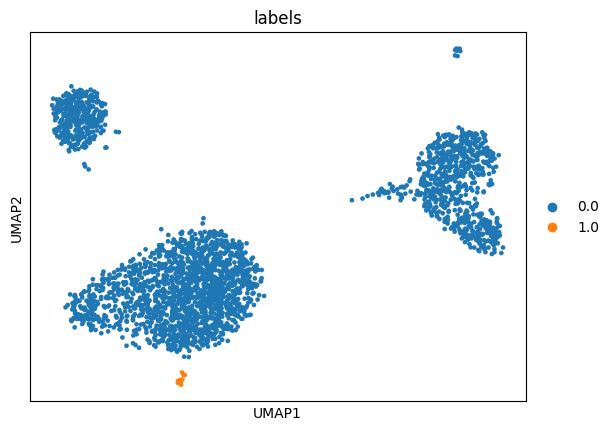

In [35]:
import scanpy as sc

# Create an AnnData object with the combined data
adata_combined = sc.AnnData(data_all)
adata_combined.obs['labels'] = labels.astype(str)

# Compute UMAP
sc.pp.neighbors(adata_combined, n_neighbors=10, use_rep='X')
sc.tl.umap(adata_combined)

# Plot UMAP
sc.pl.umap(adata_combined, color='labels')